# Load and parse data

In [2]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from string import digits
import datetime

## Load data

In [3]:
files = os.listdir('results')
files = ['results/' + f for f in files if '.json' in f]

In [4]:
results = []
for file in files:
    with open(file) as f:
        res = json.load(f)
        results.append(res)

In [5]:
df = pd.DataFrame(results)
df.sort_values('id', inplace=True)
df.reset_index(inplace=True, drop=True)

## Parse data

In [6]:
# pull neighbourhood from address if not pulled from site
df['neighbourhood_from_address'] = df['address'].str.split("\n").str.get(-1)
df['neighbourhood'] = np.where(df.neighbourhood == 'NA',df['neighbourhood_from_address'], df['neighbourhood'])
df['neighbourhood'] = np.where(df.neighbourhood == '',df['neighbourhood_from_address'], df['neighbourhood'])
del df['neighbourhood_from_address']

In [7]:
# get street from address
def get_street(s):
    remove_digits = str.maketrans('', '', digits)
    res = s.translate(remove_digits) 
    return res.strip()
df['street'] = df['address'].str.split("\n").str.get(0)
df['street'] = df['street'].apply(lambda x: get_street(x))

## Compute ranks

In [8]:
# overall rank
df['visits_rank_overall'] = df['visits'].rank(ascending=False).astype(int)

# neighbourhood rank
df["visits_rank_neighbourhood"] = df.groupby("neighbourhood")["visits"].rank("dense", ascending=False).astype(int)

# street rank
df["visits_rank_street"] = df.groupby("street")["visits"].rank("dense", ascending=False).astype(int)

## Show parsed dataframe

In [9]:
df.head()

,id,description,address,neighbourhood,visits,location,size,area,build_height,elevation,volume,street,visits_rank_overall,visits_rank_neighbourhood,visits_rank_street
0,1,Nick's parcel.,70 Block Fork\nThe Center\nOrigin City,The Center,66039,"9E,11N,",13×18 metres,234,9,0 to 9 meters,16848,Block Fork,1,1,1
1,2,Welcome to Cryptovoxels! This build was done b...,72 Block Fork\nThe Center\nOrigin City,The Center,45086,"11W,10N,",18×15 metres,270,8,0 to 8 meters,17280,Block Fork,2,2,2
2,3,,74 Block Fork\nThe Center\nOrigin City,The Center,25316,"14E,8S,",23×13 metres,299,13,0 to 13 meters,31096,Block Fork,4,4,4
3,4,,75 Block Fork\nThe Center\nOrigin City,The Center,30591,"12W,12S,",21×20 metres,420,13,0 to 13 meters,43680,Block Fork,3,3,3
4,5,,76 Block Fork\nThe Center\nOrigin City,The Center,15559,"7E,24S,",10×10 metres,100,6,0 to 6 meters,4800,Block Fork,8,8,8


In [10]:
df.tail()

,id,description,address,neighbourhood,visits,location,size,area,build_height,elevation,volume,street,visits_rank_overall,visits_rank_neighbourhood,visits_rank_street
4053,4084,,2 Dessauer Straße\nBerlin,Berlin,223,"744W,590S,",11×15 metres,165,14,0 to 14 meters,18480,Dessauer Straße,3676,66,1
4054,4085,,21 Bergmannstraße\nBerlin,Berlin,91,"592W,745S,",12×9 metres,108,17,0 to 17 meters,14688,Bergmannstraße,4009,105,14
4055,4086,,1 Schleusenufer\nBerlin,Berlin,135,"687W,533S,",14×7 metres,98,17,0 to 17 meters,13328,Schleusenufer,3911,86,7
4056,4087,,4 Mehringdamm\nBerlin,Berlin,128,"727W,562S,",18×12 metres,216,8,0 to 8 meters,13824,Mehringdamm,3932,89,1
4057,4088,,18 Bergmannstraße\nBerlin,Berlin,283,"573W,736S,",18×14 metres,252,15,0 to 15 meters,30240,Bergmannstraße,3472,55,5


## Save CSV for other people to analyse

In [11]:
filename = "cryptovoxels_" + str(datetime.datetime.now()).split('.')[0] + '.csv'
filename = filename.replace(':','-')
df.to_csv(filename)

# Analysis

## how many plots are there per neighbourhood?

Text(0.5, 0, 'Neighbourhood')

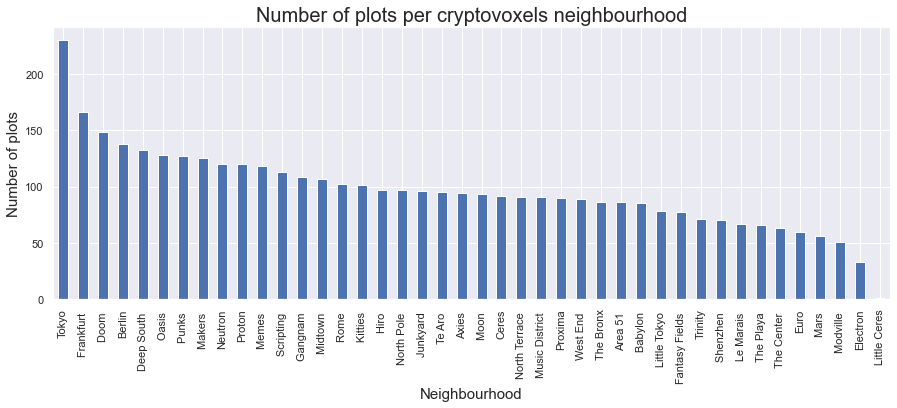

In [12]:
sns.set(rc={'figure.figsize':(15,5)})
ax = df['neighbourhood'].value_counts().plot(kind='bar')
ax.set_title("Number of plots per cryptovoxels neighbourhood", fontsize=20)
ax.set_ylabel('Number of plots', fontsize=15)
ax.set_xlabel('Neighbourhood', fontsize=15)

## What are the most popular neighbourhoods ranked on visits?

Text(0.5, 0, 'Neighbourhood')

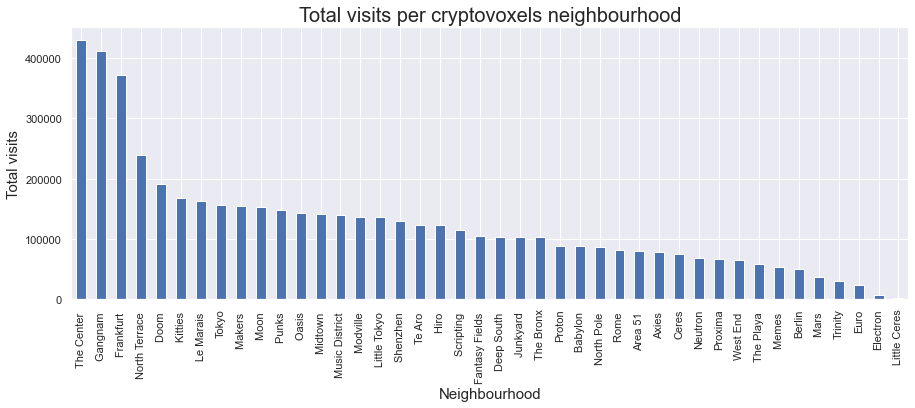

In [13]:
sns.set(rc={'figure.figsize':(15,5)})
ax = df.groupby("neighbourhood").agg(sum)['visits'].sort_values(ascending=False).plot(kind='bar')
ax.set_title("Total visits per cryptovoxels neighbourhood", fontsize=20)
ax.set_ylabel('Total visits', fontsize=15)
ax.set_xlabel('Neighbourhood', fontsize=15)

## What are the most popular streets ranked on visits?

Text(0.5, 0, 'Street')

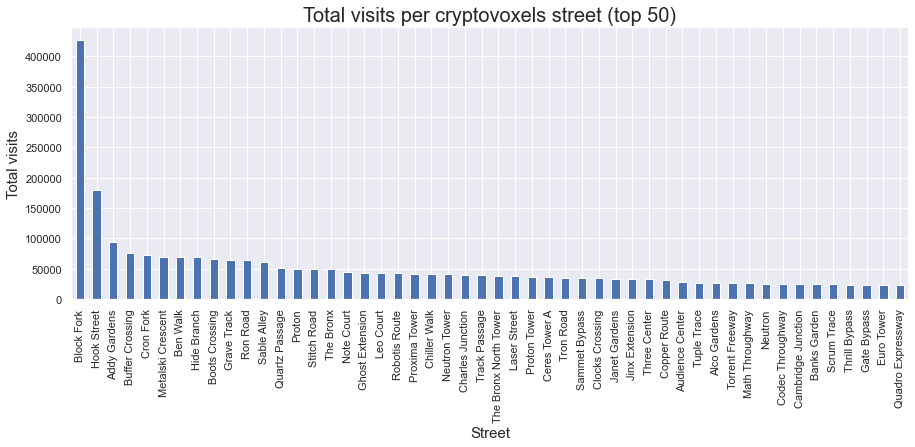

In [14]:
sns.set(rc={'figure.figsize':(15,5)})
ax = df.groupby("street").agg(sum)['visits'].sort_values(ascending=False).head(50).plot(kind='bar')
ax.set_title("Total visits per cryptovoxels street (top 50)", fontsize=20)
ax.set_ylabel('Total visits', fontsize=15)
ax.set_xlabel('Street', fontsize=15)

## Which neighbourhood has the largest parcels on average?

Text(0.5, 0, 'neighbourhood')

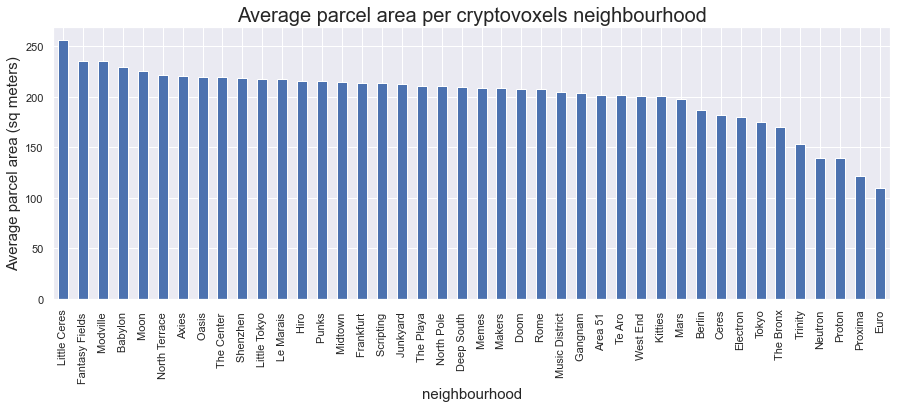

In [15]:
sns.set(rc={'figure.figsize':(15,5)})
ax = df.groupby('neighbourhood').agg(np.mean)['area'].sort_values(ascending=False).plot(kind="bar")
ax.set_title('Average parcel area per cryptovoxels neighbourhood', fontsize=20)
ax.set_ylabel('Average parcel area (sq meters)', fontsize=15)
ax.set_xlabel('neighbourhood', fontsize=15)

## Which neighbourhood has the highest build heights on average?

Text(0.5, 0, 'neighbourhood')

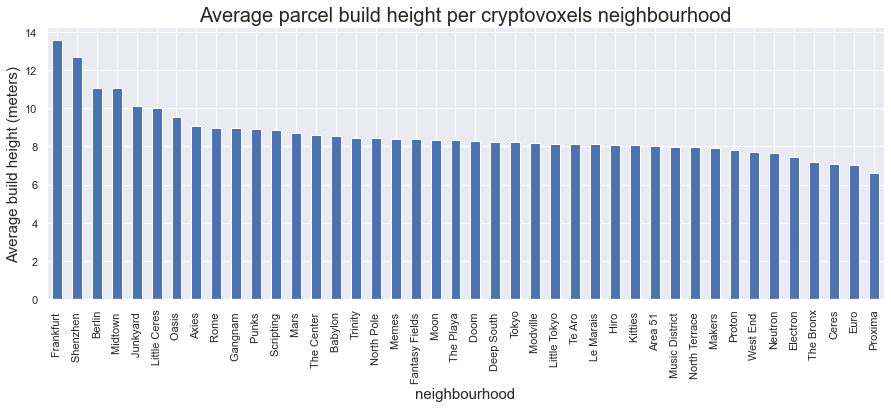

In [16]:
sns.set(rc={'figure.figsize':(15,5)})
ax = df.groupby('neighbourhood').agg(np.mean)['build_height'].sort_values(ascending=False).plot(kind="bar")
ax.set_title('Average parcel build height per cryptovoxels neighbourhood', fontsize=20)
ax.set_ylabel('Average build height (meters)', fontsize=15)
ax.set_xlabel('neighbourhood', fontsize=15)

## How do visits relate to parcel area?

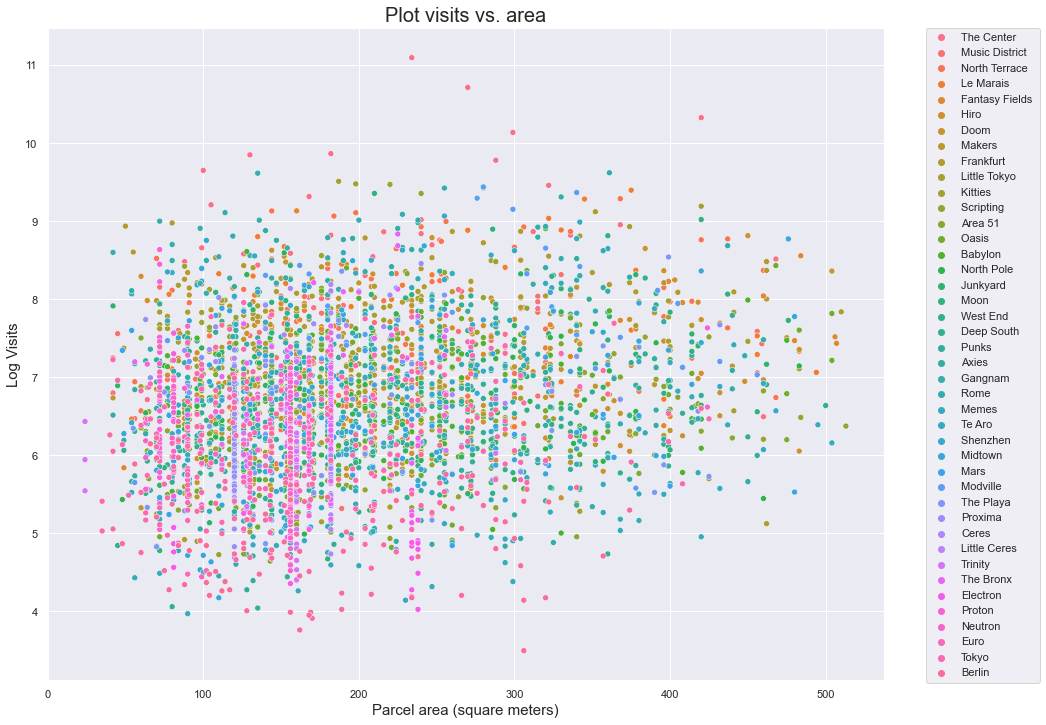

In [17]:
df['log_visits'] = np.log(df['visits'])

sns.set(rc={'figure.figsize':(15,12)})
ax = sns.scatterplot(data=df, x="area", y="log_visits", hue="neighbourhood")
ax.set_title('Plot visits vs. area', fontsize=20)
ax.set_ylabel('Log Visits', fontsize=15)
ax.set_xlabel('Parcel area (square meters)', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

> Not much correlation between parcel size and number of visits

## How do visits relate to the order in which parcels were minted?

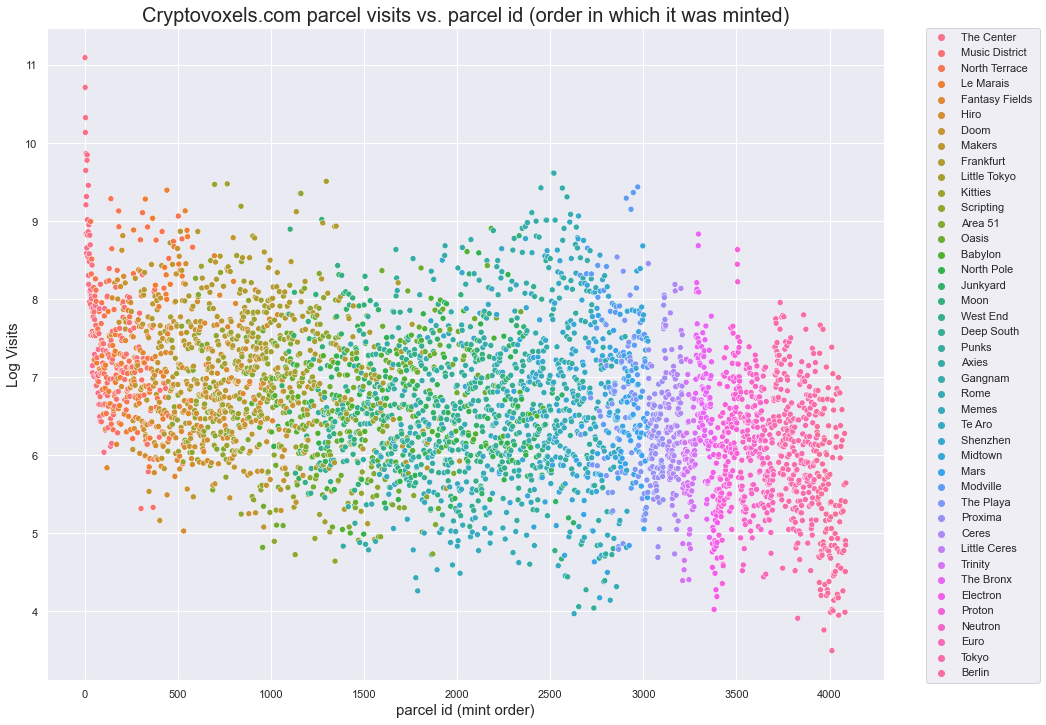

In [22]:
sns.set(rc={'figure.figsize':(15,12)})
ax = sns.scatterplot(data=df, x="id", y="log_visits", hue="neighbourhood")
ax.set_title('Cryptovoxels.com parcel visits vs. parcel id (order in which it was minted)', fontsize=20)
ax.set_ylabel('Log Visits', fontsize=15)
ax.set_xlabel('parcel id (mint order)', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

> The center has the most visits and the newer neighbourhoods have fewer visits on average as expected

## What are the top 5 plots in each neighbourhood ranked on visits?

In [19]:
neighbourhoods = list(df['neighbourhood'].unique())
neighbourhoods.sort()

In [20]:
for neighbourhood in neighbourhoods:
    dft = df[df['neighbourhood'] == neighbourhood].sort_values('visits_rank_neighbourhood')[['id','visits','visits_rank_overall','visits_rank_neighbourhood']].head(5).reset_index()
    print(f"######################  Top 5 plots in {neighbourhood.upper()} ######################")
    print(dft)
    print("")

######################  Top 5 plots in AREA 51  ######################
   index    id  visits  visits_rank_overall  visits_rank_neighbourhood
0   1253  1259    4144                  194                          1
1    592   595    3904                  219                          2
2   1175  1180    3435                  273                          3
3    607   610    3164                  317                          4
4   1341  1347    2954                  357                          5

######################  Top 5 plots in AXIES  ######################
   index    id  visits  visits_rank_overall  visits_rank_neighbourhood
0   2466  2476    8233                   41                          1
1   2554  2564    3962                  213                          2
2   2627  2637    2497                  470                          3
3   2678  2688    2237                  549                          4
4   1677  1685    2069                  616                          5

######

4   2790  2800    2150                  577                          5

######################  Top 5 plots in TOKYO ######################
   index    id  visits  visits_rank_overall  visits_rank_neighbourhood
0   3725  3735    2861                  381                          1
1   3851  3861    2442                  484                          2
2   3739  3749    2421                  491                          3
3   3745  3755    2384                  505                          4
4   3733  3743    2377                  509                          5

######################  Top 5 plots in TRINITY ######################
   index    id  visits  visits_rank_overall  visits_rank_neighbourhood
0   3221  3231    1384                 1070                          1
1   3242  3252    1344                 1101                          2
2   3229  3239    1138                 1348                          3
3   3220  3230    1029                 1503                          4
4   3234

## What are the top 5 most popular streets per neighbourhood?

In [21]:
# group
dft = pd.DataFrame(df.groupby(["neighbourhood","street"]).agg(sum)['visits'])
dft.reset_index(level=0, inplace=True)
dft.reset_index(level=0, inplace=True)
dft.sort_values(["neighbourhood",'visits'], ascending=False, inplace=True)

# loop to get top 5 in each neighbourhood - could probably do this in groupby 
cols = dft.columns
previous_neighbourhood = ""
count = 0
top5 = []
for i, r in enumerate(dft.values):
    
    row = dict(zip(cols, r))
    
    if row['neighbourhood'] == previous_neighbourhood:
        if count < 5:
            top5.append(row)
            count+=1
    else:
        count = 0
            
    previous_neighbourhood = row['neighbourhood']

# convert to dataframe
dft = pd.DataFrame(top5)
dft.sort_values(["neighbourhood", "visits"], ascending=[True,False], inplace=True)
dft = dft[['neighbourhood','street','visits']]

# compute neighbourhood rank
dft["rank"] = dft.groupby("neighbourhood")["visits"].rank("dense", ascending=False).astype(int)

# return
pd.options.display.max_rows = len(df)
dft.head(len(df))

,neighbourhood,street,visits,rank
176,Area 51,Gray Track,10046,1
177,Area 51,Mortimer Route,7330,2
178,Area 51,Gerty Court,5193,3
179,Area 51,Stoll Freeway,4962,4
180,Area 51,Ben Freeway,4865,5
171,Axies,Beetle Center,18047,1
172,Axies,Addy Fort,5463,2
173,Axies,Glove Divide,5328,3
174,Axies,Thrill Bypass,4539,4
175,Axies,Thyristor Drive,3412,5


## Want more analysis? 

> ping me on Twitter:
> [https://twitter.com/alxcnwy](https://twitter.com/alxcnwy)